# END TO END DATA SCIENCE PROJECT

In this project we will build a linear regression model that will predict profit based on a couple of variables. 

In [2]:
import pandas as pd
import numpy as np
import panel as pn


import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df =pd.read_excel('superstore.xls')

df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 21)

In [5]:
df.isna().any(axis=1).sum()

11

In [6]:
df = df.dropna(axis=0)

c:\Users\DELL\anaconda3\envs\Akin\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


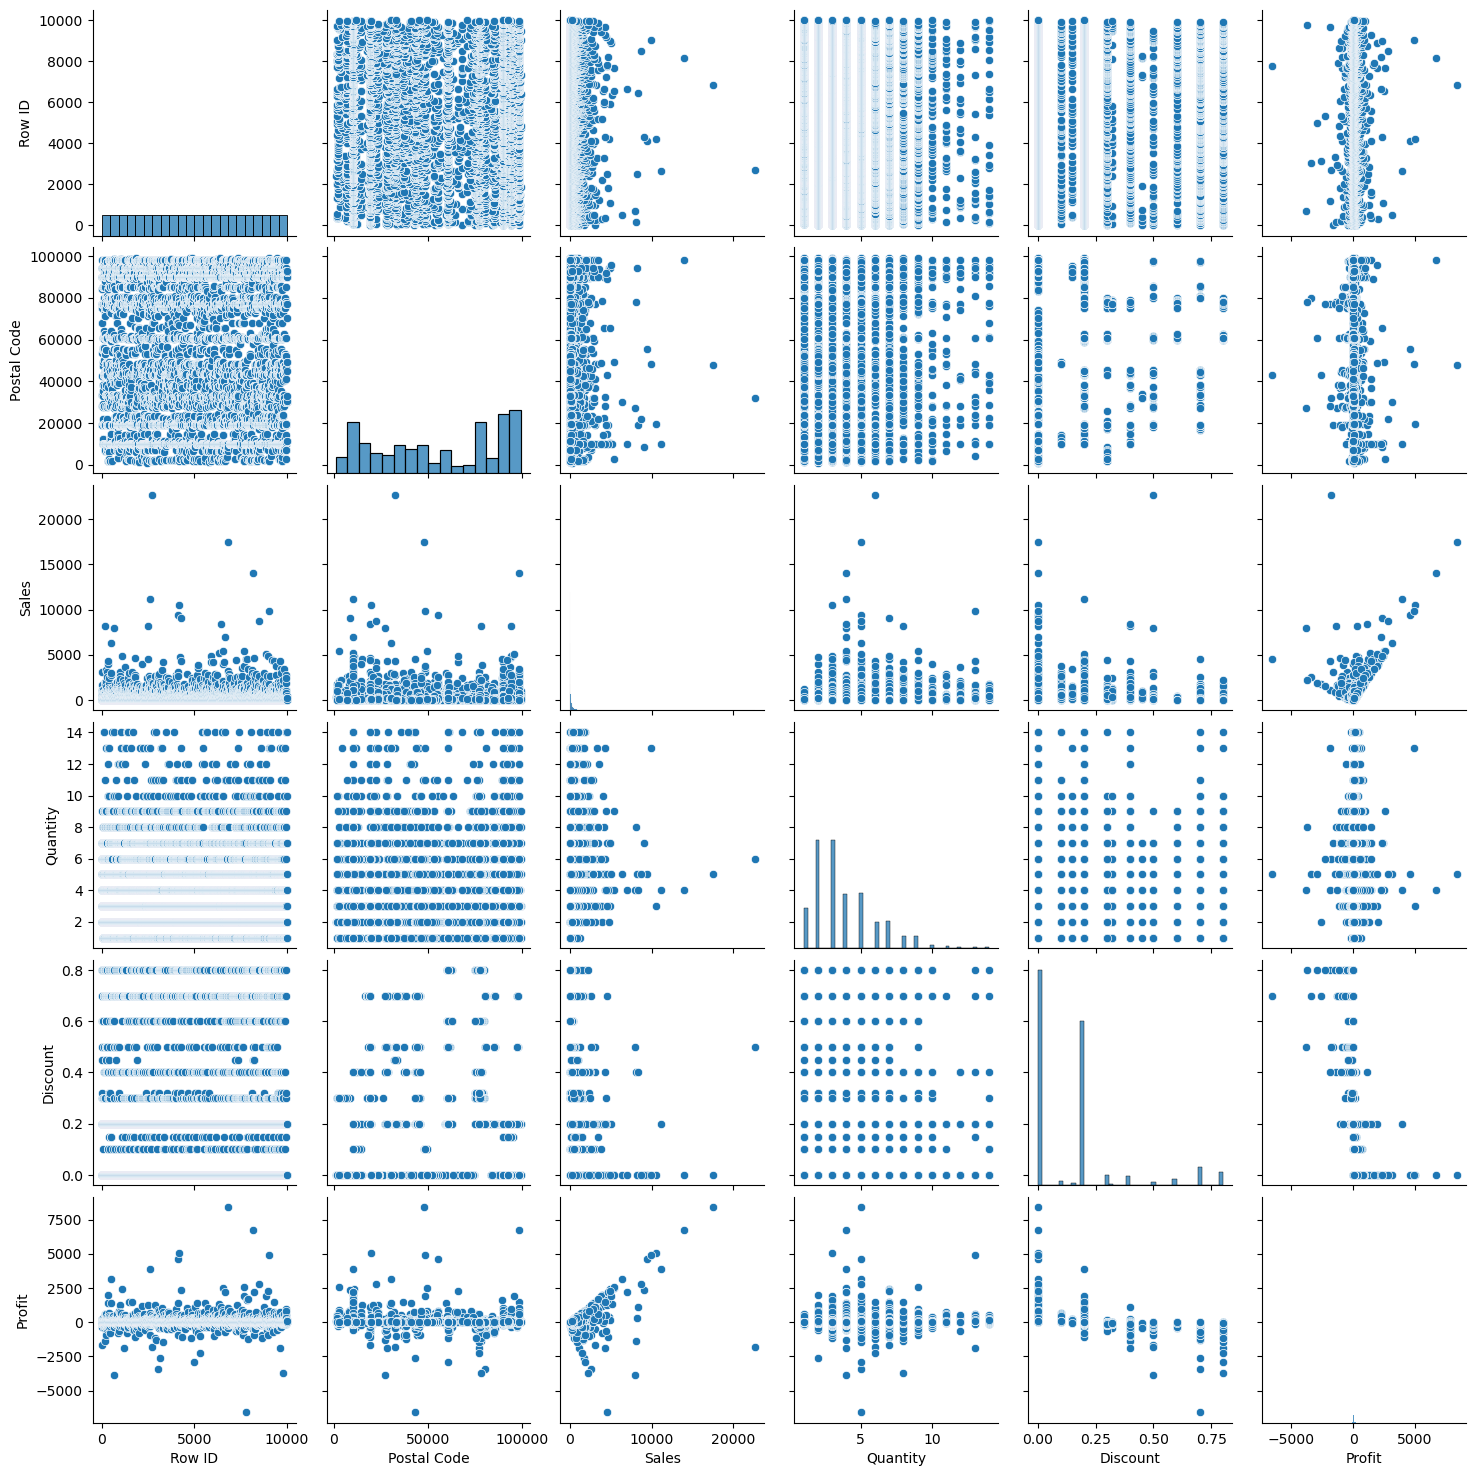

In [7]:
sns.pairplot(df)

In [8]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
df.rename(columns={'Sub-Category': 'sub_category'}, inplace= True)

In [11]:
# Lets is if we can predict profit 
# import packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [16]:
X = df[['Category', 'sub_category', 'Sales','Quantity','Discount']]
Y = df[['Profit']]

In [17]:

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
# creating an encoder to contain categorical varaibles 
ohe =OneHotEncoder()
ohe.fit(X[['Category','sub_category']])

OneHotEncoder()

In [19]:
# Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Category','sub_category']),
                                    remainder='passthrough')

column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Furniture', 'Office Supplies', 'Technology'], dtype=object),
                                                           array(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables'], dtype=object)]),
                                 ['Category', 'sub_category'])])

In [20]:
lr=LinearRegression()
#making pipelin
pipe=make_pipeline(column_trans,lr)

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Furniture', 'Office Supplies', 'Technology'], dtype=object),
                                                                            array(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables'], dtype=object)]),
                                                  ['Category',
                                                   'sub_category'])])),
                ('linearregression', LinearRegression())])

In [22]:
y_pred=pipe.predict(X_test)

In [23]:
r2_score(y_test,y_pred)

0.22902221191511662

In [24]:
#Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [25]:
np.argmax(scores)

832

In [26]:
scores[np.argmax(scores)]

0.6642364889403629

In [27]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Furniture','Bookcases',100,4,0.5]).reshape(1,5)))


array([[-181.34091507]])

In [28]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [30]:
# Model to be imported via fast api 
import joblib
joblib.dump(pipe,open('LinearRegressionModel.joblib','wb'))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9983 non-null   int64         
 1   Order ID        9983 non-null   object        
 2   Order Date      9983 non-null   datetime64[ns]
 3   Ship Date       9983 non-null   datetime64[ns]
 4   Ship Mode       9983 non-null   object        
 5   Customer ID     9983 non-null   object        
 6   Customer Name   9983 non-null   object        
 7   Segment         9983 non-null   object        
 8   Country/Region  9983 non-null   object        
 9   City            9983 non-null   object        
 10  State           9983 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9983 non-null   object        
 13  Product ID      9983 non-null   object        
 14  Category        9983 non-null   object        
 15  sub_categ

In [32]:
df_new = df[['Category','sub_category','Sales','Quantity','Discount']]
df_new.head(4)


,Category,sub_category,Sales,Quantity,Discount
0,Furniture,Bookcases,261.9600,2,0.00
1,Furniture,Chairs,731.9400,3,0.00
2,Office Supplies,Labels,14.6200,2,0.00
3,Furniture,Tables,957.5775,5,0.45


In [33]:
df_new.to_csv('cleaned_superstore.csv')
